In [40]:
import torch
import os
import pickle
import pandas as pd
import numpy as np
import swifter
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from IPython.display import clear_output
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
###########################
# Importar datos benignos #
carpeta_transformados_benign = './Dataset/TransformadosBenign'

# Obtener la lista de archivos pickle en la carpeta
pickle_files = [f for f in os.listdir(carpeta_transformados_benign) if f.endswith('.pickle')]

# Crear una lista vacía para almacenar los dataframes cargados
df_list = []

# Cargar cada archivo pickle en la lista
for file in pickle_files:
    with open(os.path.join(carpeta_transformados_benign, file), 'rb') as f:
        df = pickle.load(f)
        df_list.append(df)

# Combinar los dataframes cargados en un solo dataframe
df = pd.concat(df_list, ignore_index=True)

KeyboardInterrupt: 

In [ ]:
###########################
# Importar datos malignos #
carpeta_transformados_malware = './Dataset/TransformadosMalware'

# Obtener la lista de archivos pickle en la carpeta
pickle_files = [f for f in os.listdir(carpeta_transformados_malware) if f.endswith('.pickle')]

# Crear una lista vacía para almacenar los dataframes cargados
df_doh_list = []

# Cargar cada archivo pickle en la lista
for file in pickle_files:
    with open(os.path.join(carpeta_transformados_malware, file), 'rb') as f:
        df_doh = pickle.load(f)
        df_doh_list.append(df_doh)

# Combinar los dataframes cargados en un solo dataframe
df_doh = pd.concat(df_doh_list, ignore_index=True)

In [ ]:
del df_list
del df_doh_list

In [ ]:
print("Benign data shape: " + str(df.shape))
print("Malware data shape: " + str(df_doh.shape))

Benign data shape: (309887, 1)
Malware data shape: (174618, 1)


In [ ]:
df['label'] = np.zeros(len(df))
df_doh['label'] = np.ones(len(df_doh))

In [ ]:
data, data_doh = df, df_doh
print(data.memory_usage(index=True, deep=True))
print(data_doh.memory_usage(index=True, deep=True))

Index                           128
udps.n_bytes_per_packet    49125776
label                       2479096
dtype: int64
Index                           128
udps.n_bytes_per_packet    32542208
label                       1396944
dtype: int64


In [ ]:
del df
del df_doh

In [ ]:
# Establecer la semilla aleatoria
random.seed(8)

In [ ]:
full_data = pd.concat([data.sample(frac=0.8), data_doh.sample(frac=0.35)]).sample(frac=1)

In [ ]:
del data
del data_doh

In [ ]:
# Uncomment only for Adversarial Training
adv_data = pd.read_csv('Adversarial_data_RF_v20_updated.csv', header=0)
adv_data['udps.n_bytes_per_packet'] = adv_data['udps.n_bytes_per_packet'].swifter.apply(eval)
adv_data['label'] = np.ones(len(adv_data))

Pandas Apply:   0%|          | 0/329 [00:00<?, ?it/s]

In [ ]:
full_data = full_data.explode('udps.n_bytes_per_packet', ignore_index=True)

In [ ]:
adv_data = adv_data.explode('udps.n_bytes_per_packet', ignore_index=True)

In [ ]:
X = np.array(full_data['udps.n_bytes_per_packet'].tolist())
y = np.array(full_data['label'])

In [ ]:
X_adv = np.array(adv_data['udps.n_bytes_per_packet'].tolist())
y_adv = np.array(adv_data['label'])

In [ ]:
del full_data
del adv_data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_adv, X_test_adv, y_train_adv, y_test_adv = train_test_split(X_adv, y_adv, test_size=0.2, random_state=42)

In [ ]:
X_train = np.concatenate((X_train, X_train_adv))
y_train = np.concatenate((y_train, y_train_adv))

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=20, verbose=3, n_jobs=-1, random_state=42)
rf_classifier.fit(X_train, y_train)
clear_output(wait=True)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


building tree 1 of 200building tree 2 of 200

building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200


[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  8.4min


building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
building tree 43 of 200
building tree 44 of 200
building tree 45 of 200
building tree 46 of 200
building tree 47 of 200
building tree 48 of 200
building tree 49 of 200
building tree 50 of 200
building tree 51 of 200
building tree 52 of 200
building tree 53 of 200
building tree 54 of 200
building tree 55 of 200
building tree 56 of 200
building tree 57 of 200
building tree 58 of 200
building tree 59 of 200
building tree 60 of 200
building tree 61 of 200
building tree 62 of 200
building tree 63 of 200
building tree 64 of 200
building tree 65 of 200
building tree 66

[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 52.1min


building tree 121 of 200
building tree 122 of 200
building tree 123 of 200
building tree 124 of 200
building tree 125 of 200
building tree 126 of 200
building tree 127 of 200
building tree 128 of 200
building tree 129 of 200
building tree 130 of 200
building tree 131 of 200
building tree 132 of 200
building tree 133 of 200
building tree 134 of 200
building tree 135 of 200
building tree 136 of 200
building tree 137 of 200
building tree 138 of 200
building tree 139 of 200
building tree 140 of 200
building tree 141 of 200
building tree 142 of 200
building tree 143 of 200
building tree 144 of 200
building tree 145 of 200
building tree 146 of 200
building tree 147 of 200
building tree 148 of 200
building tree 149 of 200
building tree 150 of 200
building tree 151 of 200
building tree 152 of 200
building tree 153 of 200
building tree 154 of 200
building tree 155 of 200
building tree 156 of 200
building tree 157 of 200
building tree 158 of 200
building tree 159 of 200
building tree 160 of 200


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 91.3min finished


In [ ]:
y_pred = rf_classifier.predict(X_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.3s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    8.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   14.6s finished


In [ ]:
y_pred_adv = rf_classifier.predict(X_test_adv)
print(sum(y_pred_adv), len(y_pred_adv))

56.0 66


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [ ]:
accuracy_adv = accuracy_score(y_test_adv, y_pred_adv)
print("Precisión del modelo: {:.4f}".format(accuracy_adv))

Precisión del modelo: 0.8485


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.4f}".format(accuracy))

Precisión del modelo: 0.8441


In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(cm)

Matriz de Confusión:
[[465149     69]
 [ 96595  58233]]


In [ ]:
print(classification_report(y_test, y_pred, labels=None))

              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91    465218
         1.0       1.00      0.38      0.55    154828

    accuracy                           0.84    620046
   macro avg       0.91      0.69      0.73    620046
weighted avg       0.87      0.84      0.82    620046



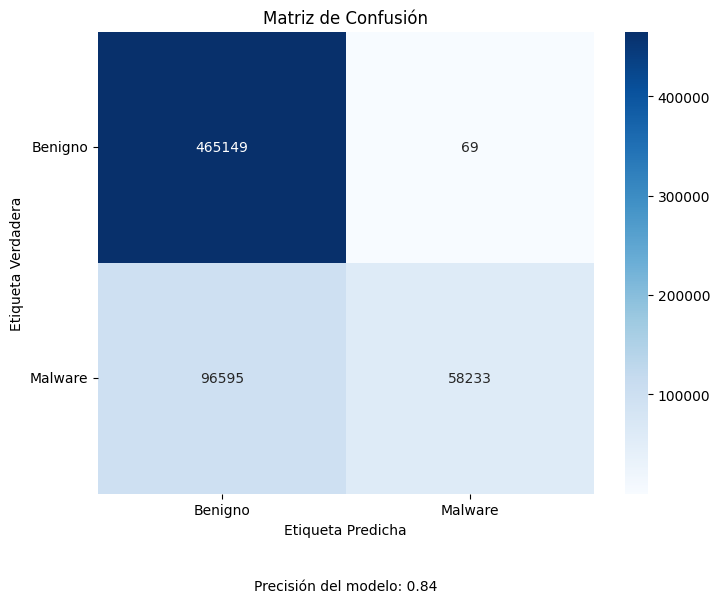

In [ ]:
# Definir los textos de reemplazo
labels = ['Benigno', 'Malware']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Rotar los labels
#plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.title('Matriz de Confusión')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')

# Agregar el texto de precisión debajo de la matriz de confusión
plt.text(0.5, -0.2, f'Precisión del modelo: {accuracy:.2f}', ha='center', va='center', transform=plt.gca().transAxes)

plt.show()

In [ ]:
filename = "robust_random_forest_v5.pkl"
with open(filename, 'wb') as file:
    pickle.dump(rf_classifier, file)

In [ ]:
X_full = np.concatenate((X_train, X_test, X_test_adv))
y_full = np.concatenate((y_train, y_test, y_test_adv))

In [44]:
rf_robust = RandomForestClassifier(n_estimators=200, max_depth=20, verbose=3, n_jobs=-1, random_state=42)
scores = cross_val_score(rf_robust, X_full, y_full, cv=5)
print("Puntajes de precisión: ", scores)
print("Presición promedio: ", scores.mean())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 67.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 114.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 112 tasks      | elapsed:    8.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:   15.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 66.3min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 109.1min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=8)]: Done 112 tasks      |

Puntajes de precisión:  [0.84457927 0.84517923 0.84514213 0.8448661  0.84442903]
Presición promedio:  0.844839153641869
